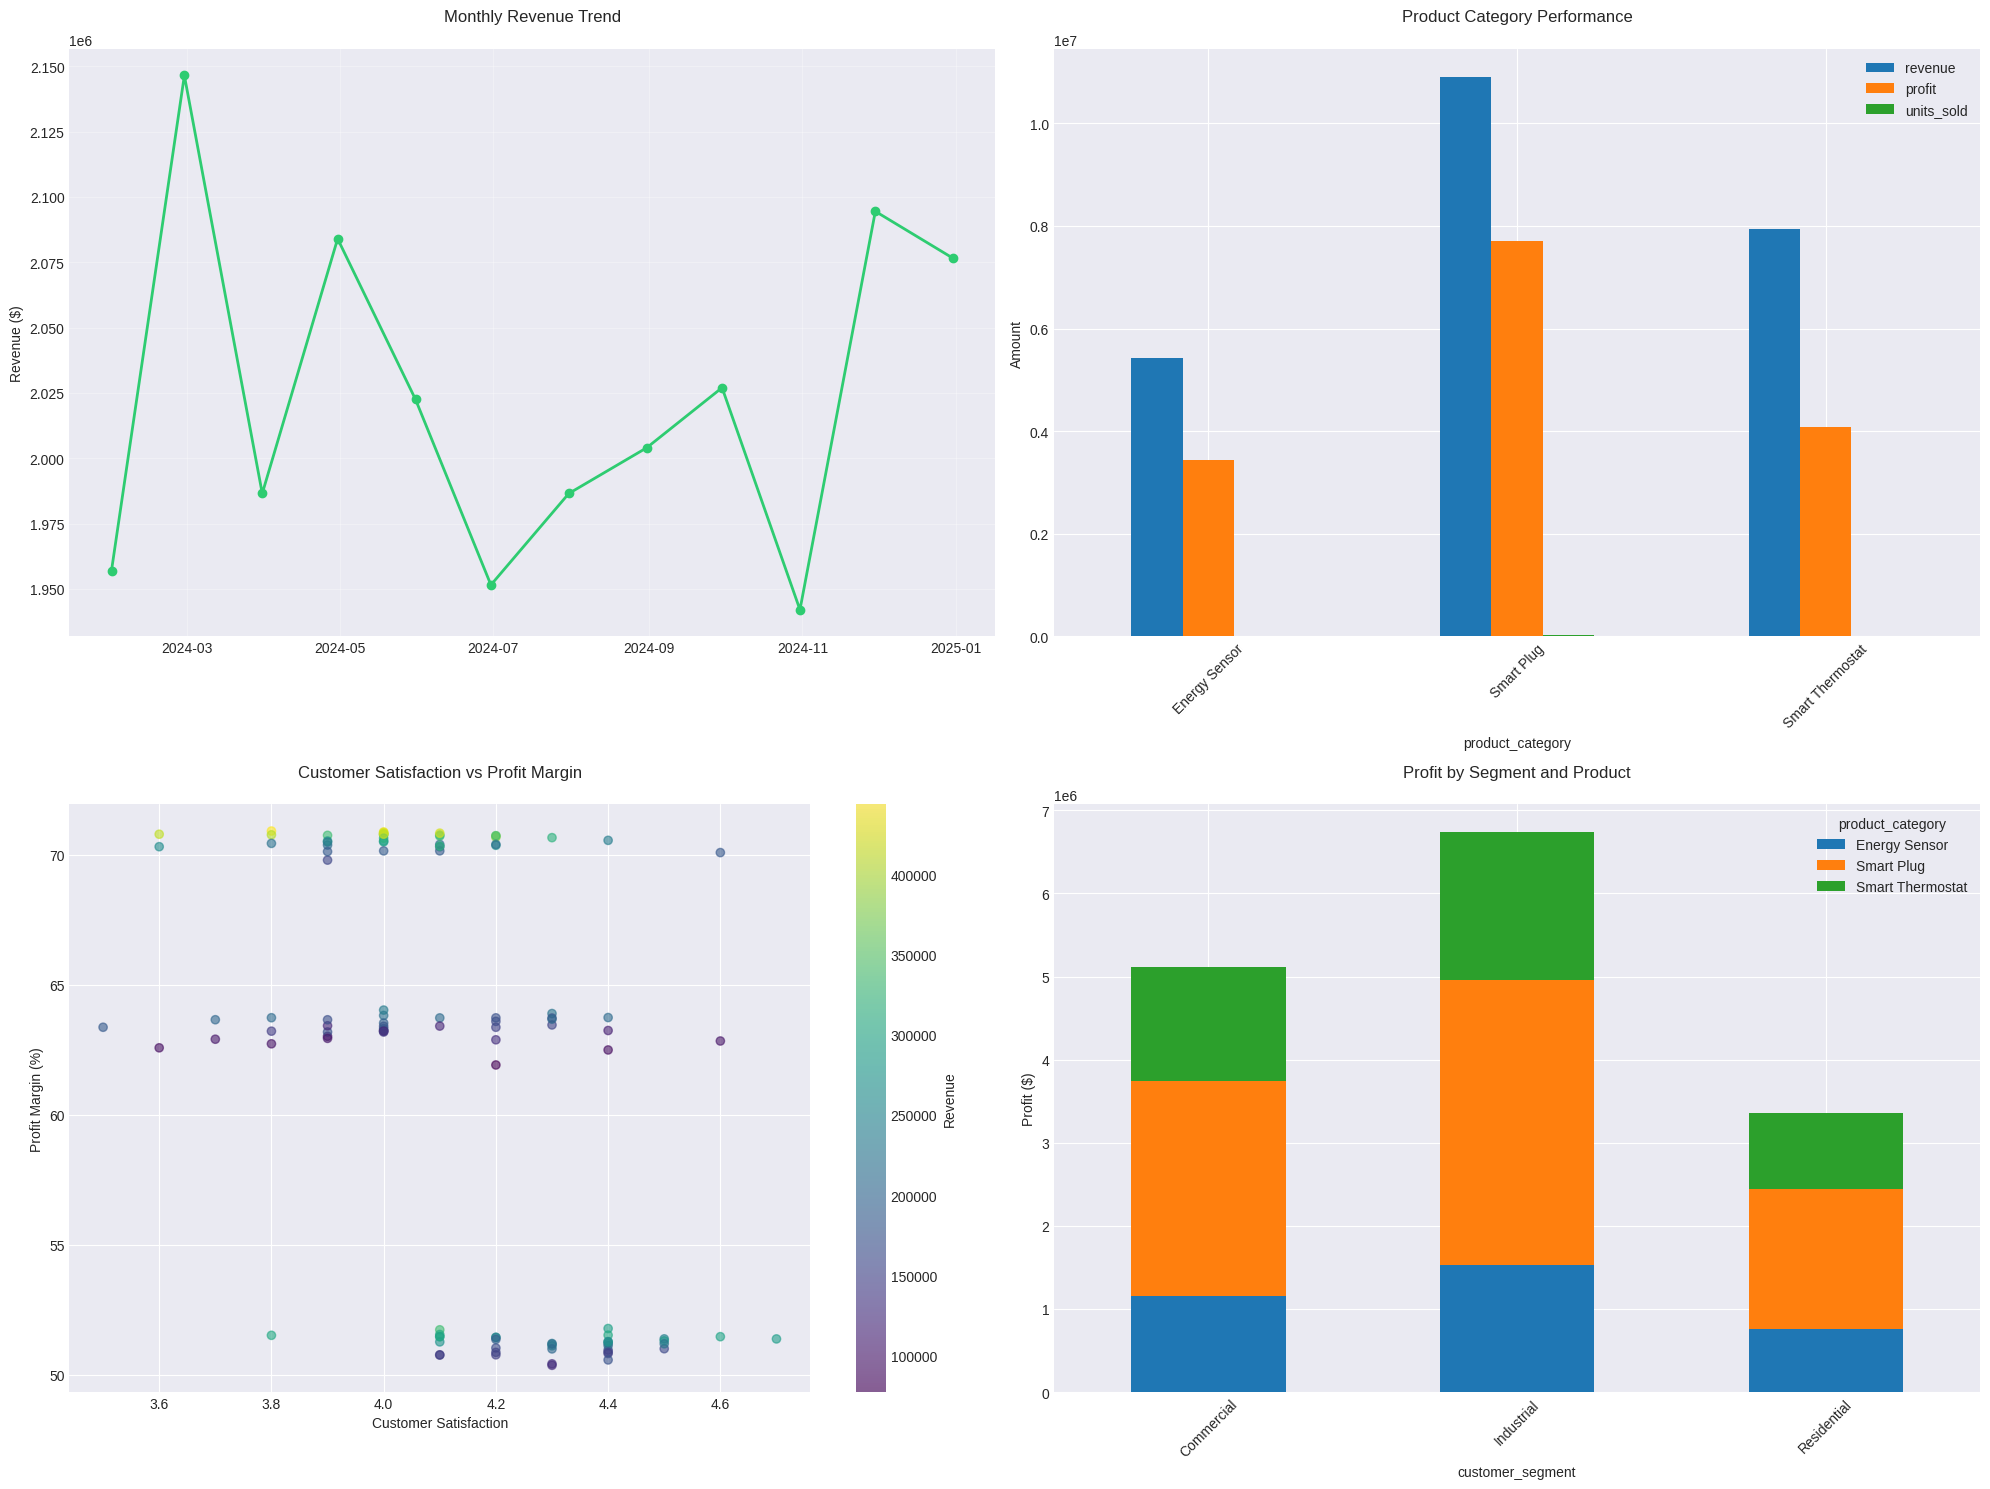

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

class GreenHomeFinancialAnalysis:
    def __init__(self, unit_price=500, fixed_cost=2000):
        """
        Initialize the analysis system with pricing and cost parameters

        Args:
            unit_price (float): Base price per unit
            fixed_cost (float): Monthly fixed costs
        """
        self.unit_price = unit_price
        self.fixed_cost = fixed_cost
        self.product_categories = ['Smart Thermostat', 'Energy Sensor', 'Smart Plug']
        self.customer_segments = ['Residential', 'Commercial', 'Industrial']

    def generate_sample_data(self, start_date='2024-01-01', periods=12):
        """
        Generate realistic sample data with seasonal patterns and segment-specific behaviors

        Args:
            start_date (str): Start date for data generation
            periods (int): Number of months to generate

        Returns:
            pandas.DataFrame: Generated sample data
        """
        # Use ME instead of M for month-end frequency
        dates = pd.date_range(start=start_date, periods=periods, freq='ME')
        data_rows = []

        # Product-specific characteristics
        product_specs = {
            'Smart Thermostat': {'base_sales': 300, 'base_cost': 250, 'satisfaction_base': 4.3},
            'Energy Sensor': {'base_sales': 200, 'base_cost': 180, 'satisfaction_base': 4.1},
            'Smart Plug': {'base_sales': 400, 'base_cost': 150, 'satisfaction_base': 4.0}
        }

        # Segment multipliers
        segment_multipliers = {
            'Residential': {'sales': 1.0, 'marketing': 1000},
            'Commercial': {'sales': 1.5, 'marketing': 2000},
            'Industrial': {'sales': 2.0, 'marketing': 3000}
        }

        for date in dates:
            # Calculate seasonal factor with more realistic pattern
            # Peak in summer (July) and winter (January)
            month = date.month
            summer_factor = np.sin(2 * np.pi * (month - 7) / 12)  # Peak in July
            winter_factor = np.sin(2 * np.pi * (month - 1) / 12)  # Peak in January
            season_factor = 1 + 0.2 * (summer_factor + winter_factor)

            for category in self.product_categories:
                specs = product_specs[category]

                for segment in self.customer_segments:
                    multipliers = segment_multipliers[segment]

                    # Calculate base sales with seasonal and random variations
                    base_sales = int(
                        specs['base_sales'] *
                        multipliers['sales'] *
                        season_factor *
                        (1 + np.random.normal(0, 0.1))
                    )

                    # More realistic customer satisfaction calculation
                    base_satisfaction = specs['satisfaction_base']
                    satisfaction = round(
                        base_satisfaction * (1 + np.random.normal(0, 0.05)),
                        1
                    )
                    satisfaction = min(max(satisfaction, 1), 5)

                    # Calculate costs with economy of scale
                    manufacturing_cost = (
                        self.fixed_cost +
                        (base_sales * specs['base_cost'] *
                         (1 - np.log(base_sales) / 100))  # Economy of scale
                    )

                    # Calculate warranty claims with product-specific rates
                    warranty_rate = np.random.beta(2, 40)  # Typically 2-5%
                    warranty_claims = int(base_sales * warranty_rate)

                    data_rows.append({
                        'date': date,
                        'product_category': category,
                        'customer_segment': segment,
                        'units_sold': base_sales,
                        'marketing_spend': multipliers['marketing'],
                        'customer_satisfaction': satisfaction,
                        'manufacturing_cost': manufacturing_cost,
                        'warranty_claims': warranty_claims
                    })

        self.df = pd.DataFrame(data_rows)
        self.calculate_financial_metrics()
        return self.df

    def calculate_financial_metrics(self):
        """Calculate comprehensive financial and operational metrics"""
        # Revenue and profit metrics
        self.df['revenue'] = self.df['units_sold'] * self.unit_price
        self.df['total_cost'] = self.df['manufacturing_cost'] + self.df['marketing_spend']
        self.df['profit'] = self.df['revenue'] - self.df['total_cost']
        self.df['profit_margin'] = (self.df['profit'] / self.df['revenue']) * 100

        # Operational metrics
        self.df['cost_per_unit'] = self.df['total_cost'] / self.df['units_sold']
        self.df['marketing_efficiency'] = self.df['units_sold'] / self.df['marketing_spend']
        self.df['warranty_rate'] = (self.df['warranty_claims'] / self.df['units_sold']) * 100

        # Growth metrics
        for metric in ['revenue', 'profit', 'units_sold']:
            self.df[f'{metric}_growth'] = self.df.groupby(
                ['product_category', 'customer_segment']
            )[metric].pct_change() * 100

    def generate_visualizations(self):
        """Generate key business visualizations with improved styling"""
        # Set style for better visualizations
        plt.style.use('seaborn-v0_8-darkgrid')

        # Create figure with subplots
        fig = plt.figure(figsize=(20, 15))

        # 1. Revenue Trend
        ax1 = plt.subplot(2, 2, 1)
        revenue_by_date = self.df.groupby('date')['revenue'].sum()
        ax1.plot(revenue_by_date.index, revenue_by_date.values,
                marker='o', linewidth=2, color='#2ecc71')
        ax1.set_title('Monthly Revenue Trend', pad=20)
        ax1.set_ylabel('Revenue ($)')
        ax1.grid(True, alpha=0.3)

        # 2. Product Performance
        ax2 = plt.subplot(2, 2, 2)
        product_metrics = self.df.groupby('product_category').agg({
            'revenue': 'sum',
            'profit': 'sum',
            'units_sold': 'sum'
        })
        product_metrics.plot(kind='bar', ax=ax2)
        ax2.set_title('Product Category Performance', pad=20)
        ax2.set_ylabel('Amount')
        plt.xticks(rotation=45)

        # 3. Customer Satisfaction vs Profit Margin
        ax3 = plt.subplot(2, 2, 3)
        scatter = ax3.scatter(
            self.df['customer_satisfaction'],
            self.df['profit_margin'],
            c=self.df['revenue'],
            cmap='viridis',
            alpha=0.6
        )
        plt.colorbar(scatter, label='Revenue')
        ax3.set_title('Customer Satisfaction vs Profit Margin', pad=20)
        ax3.set_xlabel('Customer Satisfaction')
        ax3.set_ylabel('Profit Margin (%)')

        # 4. Segment Analysis
        ax4 = plt.subplot(2, 2, 4)
        segment_profit = self.df.groupby(['customer_segment', 'product_category'])['profit'].sum()
        segment_profit.unstack().plot(kind='bar', stacked=True, ax=ax4)
        ax4.set_title('Profit by Segment and Product', pad=20)
        ax4.set_ylabel('Profit ($)')
        plt.xticks(rotation=45)

        plt.tight_layout()
        return fig

    def generate_summary_report(self):
        """Generate a comprehensive business summary report"""
        # Overall performance
        total_revenue = self.df['revenue'].sum()
        total_profit = self.df['profit'].sum()
        overall_margin = (total_profit / total_revenue) * 100

        # Product performance
        product_metrics = self.df.groupby('product_category').agg({
            'revenue': 'sum',
            'profit': 'sum',
            'units_sold': 'sum',
            'customer_satisfaction': 'mean',
            'warranty_rate': 'mean'
        }).round(2)

        # Segment performance
        segment_metrics = self.df.groupby('customer_segment').agg({
            'revenue': 'sum',
            'profit': 'sum',
            'units_sold': 'sum',
            'marketing_efficiency': 'mean'
        }).round(2)

        return {
            'overall_metrics': {
                'total_revenue': total_revenue,
                'total_profit': total_profit,
                'overall_margin': overall_margin
            },
            'product_metrics': product_metrics,
            'segment_metrics': segment_metrics
        }

# Example usage
if __name__ == "__main__":
    # Initialize analysis
    analysis = GreenHomeFinancialAnalysis()

    # Generate and analyze data
    df = analysis.generate_sample_data()

    # Generate visualizations
    fig = analysis.generate_visualizations()

    # Get summary report
    report = analysis.generate_summary_report()

    # Save outputs
    df.to_csv('green_home_analysis.csv', index=False)
    fig.savefig('green_home_analysis.png', dpi=300, bbox_inches='tight')
